In [99]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [100]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [101]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [102]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [103]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [104]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [105]:
inspector = inspect(engine)

In [106]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [107]:
# Create our session (link) from Python to the DB
session = Session(engine)
display(session.query(Measurement).first().__dict__)
display(session.query(Station).first().__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cde357dda0>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cde3582160>,
 'elevation': 3.0,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716}

# Exploratory Precipitation Analysis

In [108]:
# Find the most recent date in the data set.
import datetime as dt
recent_mth = session.query(func.max(Measurement.date)).all()
recent_mth

[('2017-08-23')]

In [109]:
# Storing the data from a year to the most recent date

p_date = []
p_prec = []
for row in session.query(Measurement).filter(Measurement.date >= '2016-08-23'):
    p_date.append(row.date)
    p_prec.append(row.prcp)


In [110]:

# Creating the pandas dataframe
p_dataFrame = pd.DataFrame({'Date':p_date, 'Precipitation':p_prec}).sort_values(by='Date', ascending= True)
p_dataFrame

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


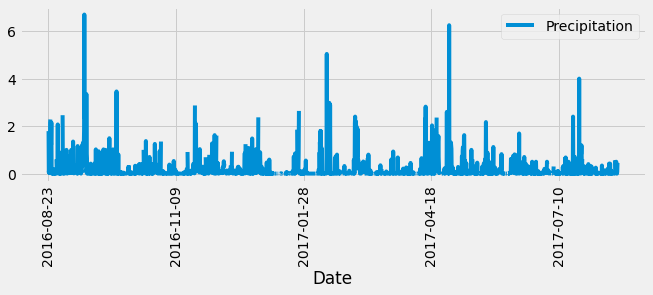

In [111]:
# Using pandas to plot the results

p_chart = p_dataFrame.plot(x='Date', y='Precipitation',figsize=(10,3))
plt.xticks(rotation=90)
p_chart

In [112]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_dataFrame.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [113]:
# Design a query to calculate the total number stations in the dataset
tot_stations = session.query(Station).count()
tot_stations

9

In [114]:
inspector = inspector.get_columns('station')
info = pd.DataFrame(inspector)
display(info.head())

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0


In [115]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the statians and the counts in descending order.
st_group = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
st_group

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Base on the data presented the station USC00519281 has the highest number of observations

In [116]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).all()
print(f'The lowest observed temperature was {lowest_temp[0][0]}')
highest_temp = session.query(func.max(Measurement.tobs)).all()
print(f'The highest observed temperature was {highest_temp[0][0]}')
avg_temp = session.query(func.avg(Measurement.tobs)).all()
print(f'The average observed temperature was {round(avg_temp[0][0],2)}')

The lowest observed temperature was 53.0
The highest observed temperature was 87.0
The average observed temperature was 73.1


In [117]:
# Calculating the most recent date for station USC00519281

st_recent_mth = session.query(func.max(Measurement.date))\
    .filter(Measurement.station == 'USC00519281').all()
st_recent_mth

[('2017-08-18')]

In [120]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

p_temp_f = []
p_date_f = []
stat_c = []
for row in session.query(Measurement)\
    .filter(and_(Measurement.date >= '2016-08-18', 
                 Measurement.station == 'USC00519281')):

    p_date_f.append(row.date)
    p_temp_f.append(row.tobs)
    stat_c.append(row.station)


# Displaying a DataFrame to check filtered data is within filters selected

st_temp_data = pd.DataFrame({'Date':p_date_f, 
              'Temperature':p_temp_f,
              'Station':stat_c })
st_temp_data


,Date,Temperature,Station
0,2016-08-18,80.0,USC00519281
1,2016-08-19,79.0,USC00519281
2,2016-08-20,81.0,USC00519281
3,2016-08-21,79.0,USC00519281
4,2016-08-22,78.0,USC00519281
...,...,...,...
352,2017-08-14,77.0,USC00519281
353,2017-08-15,77.0,USC00519281
354,2017-08-16,76.0,USC00519281
355,2017-08-17,76.0,USC00519281


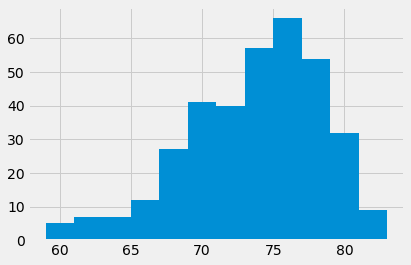

In [121]:
# Plotting retrieved data
plt.hist(p_temp_f, bins=12)
plt.show()

# Close session

In [122]:
# Close Session
session.close()